In [1]:
###########DT##################
#wine
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
from sklearn import random_projection
from scipy.linalg import pinv
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

#import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

#load data
df = pd.read_csv (r'./data/wine.csv')

#preprocessing
# convert target to binary
df.loc[df.quality =='bad', "quality"] = 0 #bad wine
df.loc[df.quality == 'good', "quality"] = 1 #good wine
#get the target
y = df.pop('quality')
#scale features
X_scaled = preprocessing.scale(df)

#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)



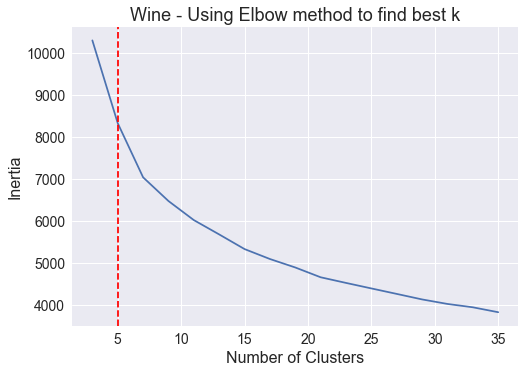

In [2]:
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
#mean squared distance between each instance and its closest centroid. Also called inertia
msd = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=1)
    c_labels = c.fit(X_train)
    msd.append(c.inertia_)
plt.style.use('seaborn')
plt.plot([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35],msd)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Wine - Using Elbow method to find best k', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

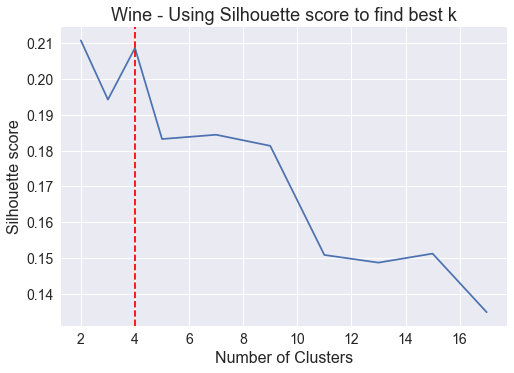

In [3]:
cluster_range = [2,3,4,5,7,9,11,13,15,17]
#mean squared distance between each instance and its closest centroid. Also called inertia
silhouette_list = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=10)
    c_labels = c.fit_predict(X_train)
    silhouette_list.append(silhouette_score(X_train, c_labels))
plt.style.use('seaborn')
plt.plot([2,3,4,5,7,9,11,13,15,17],silhouette_list)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Silhouette score', fontsize = 16)
plt.title('Wine - Using Silhouette score to find best k', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=4,color='r', linestyle='--')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2107636581864259
For n_clusters = 3 The average silhouette_score is : 0.19424348922044163
For n_clusters = 4 The average silhouette_score is : 0.20865154442736158
For n_clusters = 5 The average silhouette_score is : 0.18324793954853183
For n_clusters = 6 The average silhouette_score is : 0.1919354496279031


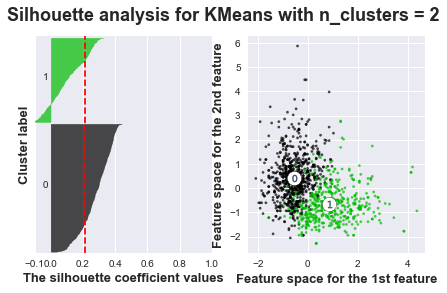

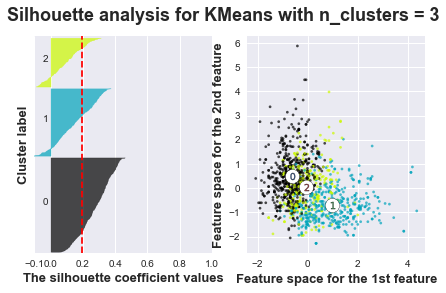

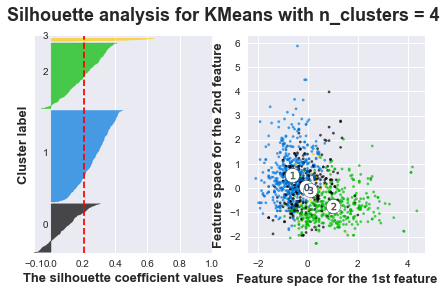

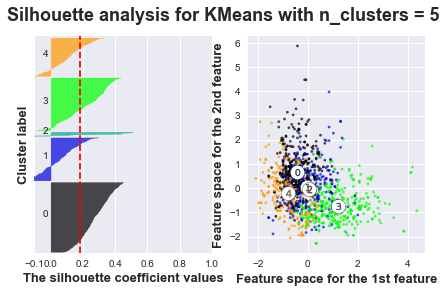

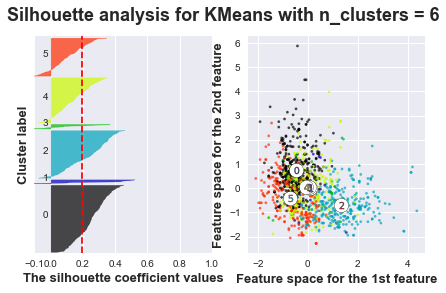

In [4]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(7, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values",fontsize=13,fontweight='bold')
    ax1.set_ylabel("Cluster label",fontsize=13,fontweight='bold')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train[:, 0], X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature",fontsize=13,fontweight='bold')
    ax2.set_ylabel("Feature space for the 2nd feature",fontsize=13,fontweight='bold')

    plt.suptitle(("Silhouette analysis for KMeans "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=18, fontweight='bold')

plt.show()

In [5]:
cluster_range = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
#mean squared distance between each instance and its closest centroid. Also called inertia
bic_main = []
bic_by_cv = []
covariance_type = ['spherical', 'tied', 'diag', 'full']
for cv in covariance_type:
    for num_cluster in cluster_range:
        gmm = GaussianMixture(covariance_type = cv, n_components = num_cluster, n_init = 10, random_state=1)
        c_labels = gmm.fit(X_train)
        bic_by_cv.append(gmm.bic(X_train))
    bic_main.append(bic_by_cv)
    bic_by_cv = []

In [6]:
#covariance_type full has the smallest bic
[min(i) for i in bic_main]

[31093.54942566633, 29200.77201818174, 29740.52634183468, 28317.052062551717]

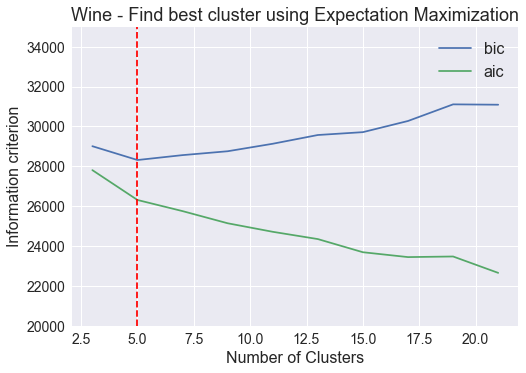

In [7]:
cluster_range = [3,5,7,9,11,13,15,17,19,21]
bic = []
aic = []
for num_cluster in cluster_range:
    gmm = GaussianMixture(covariance_type = 'full', n_components = num_cluster, n_init = 10,random_state=1)
    c_labels = gmm.fit(X_train)
    bic.append(gmm.bic(X_train))
    aic.append(gmm.aic(X_train))
plt.style.use('seaborn')
plt.plot([3,5,7,9,11,13,15,17,19,21],bic,label = 'bic')
plt.plot([3,5,7,9,11,13,15,17,19,21],aic,label = 'aic')
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Information criterion', fontsize = 16)
plt.legend(fontsize=16)
plt.title('Wine - Find best cluster using Expectation Maximization', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim(20000,35000)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

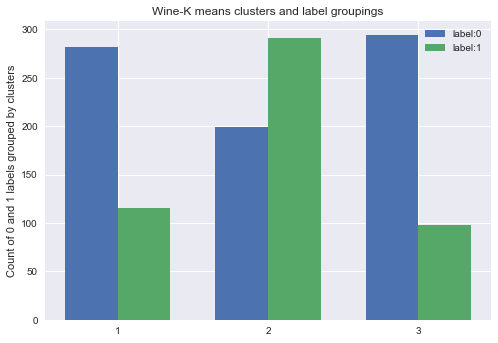

In [8]:
def convert_numarr_to_df (X_train,labels,features):
    #convert back X_train to df for visulaization
    rows = X_train.shape[0]
    #target = np.reshape(y_train.to_numpy(),(rows,1))
    labels = np.reshape(labels,(rows,1))
    X_train_vis = np.hstack((X_train,labels))
    features.append('class')
    #print(X_train_vis.shape)
    #print(features)
    df_vis = pd.DataFrame(data=X_train_vis,    # values
            #index=data[1:,0],    # 1st column as index
            columns=features)
    return df_vis


rows = X_train.shape[0]
y_train2 = y_train.to_numpy()
y_train2 = np.reshape(y_train2,(rows,1))
X_train_vis = np.hstack((X_train,y_train2))

columns = list(df.columns)
columns.append('y')
c = KMeans(n_clusters=3, random_state=10)
c_labels = c.fit_predict(X_train)
df_converted = convert_numarr_to_df(X_train_vis,c_labels,columns)

df_converted.groupby(['class','y']).count()


#wine-kmeans grouping
clusters = ['1', '2', '3']
zero_label = [282, 199, 294]
one_label = [115, 291, 98]

x = np.arange(len(clusters))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, zero_label, width, label='label:0')
rects2 = ax.bar(x + width/2, one_label, width, label='label:1')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of 0 and 1 labels grouped by clusters')
ax.set_title('Wine-K means clusters and label groupings')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

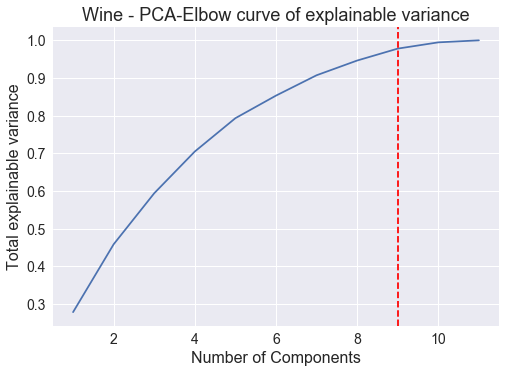

(1279, 9)

In [9]:
#PCA
n_features = X_train.shape[1]
total_explained_variance = []
pca = PCA(n_components = n_features, random_state = 42)
X_reduced = pca.fit_transform(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.style.use('seaborn')
plt.plot(range(1,n_features+1),cumsum)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Total explainable variance', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Wine - PCA-Elbow curve of explainable variance', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(20000,35000)
plt.axvline(x=9,color='r', linestyle='--')
plt.show()

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape

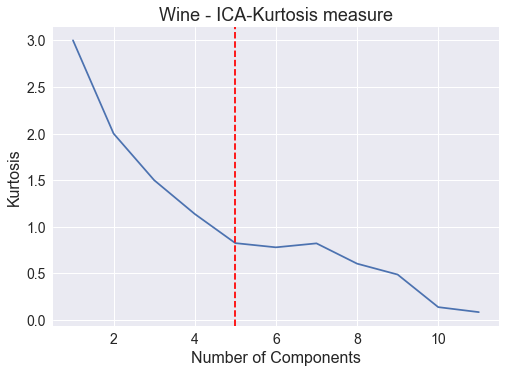

In [10]:
#ICA
n_features = X_train.shape[1]
total_explained_variance = []
kurtosis_avg = []
for feature in range(1,n_features+1):
    ica = FastICA(n_components = feature, random_state = 42,whiten = True)
    X_reduced = ica.fit_transform(X_train)
    kurtosis_col_list = []
    for col in range(X_reduced.shape[1]):
        kurtosis_col_list.append(kurtosis(X_reduced[col]))
    kurtosis_avg.append(np.abs(np.mean(kurtosis_col_list)))

plt.style.use('seaborn')
plt.plot(range(1,n_features+1),kurtosis_avg)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Kurtosis', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Wine - ICA-Kurtosis measure', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(20000,35000)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

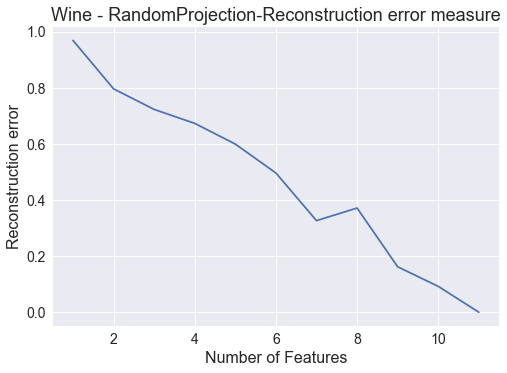

In [11]:
#randomized projection
n_features = X_train.shape[1]
error_list = []
for feature in range(1,n_features+1):
    transformer = random_projection.GaussianRandomProjection(n_components=feature)
    X_new = transformer.fit_transform(X_train)
    #Example:X_train = 5000*784
    #randomize projection with 30 components
    #if your components.T is [784,30], then taking the np.linalg.pinv
    #of that would give you [30,784]. then your Xinverse is dot product
    #of your reduced output [5000,30] and [30,784], giving you [5000,784].
    #then compare to your original dataset
    W = transformer.components_.T
    p = pinv(W)
    reconstructed_matrix = X_new.dot(p)
    error = np.mean(np.square(reconstructed_matrix-X_train))
    error_list.append(error)
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),error_list)
plt.xlabel('Number of Features', fontsize = 16)
plt.ylabel('Reconstruction error', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Wine - RandomProjection-Reconstruction error measure', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(20000,35000)
#plt.axvline(x=9,color='r', linestyle='--')
plt.show()

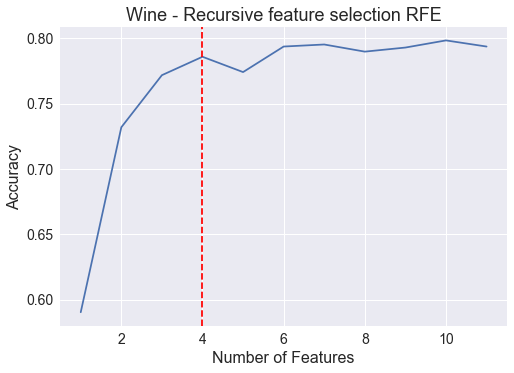

In [12]:
#recursive feature selection RFE
#dim reduction using labels
n_features = X_train.shape[1]
y_train=y_train.astype('int')
accuracy_list = []
kfold = StratifiedKFold(n_splits=3, random_state=42,shuffle = True)
for feature in range(1,n_features+1):
    selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=feature)
    selector = selector.fit(X_train, y_train)
    X_new = X_train[:,selector.support_]
    rf = RandomForestClassifier(random_state=42)
    mean_accuracy = np.mean(cross_val_score(rf, X_new, y_train, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise'))
    accuracy_list.append(mean_accuracy)
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),accuracy_list)
plt.xlabel('Number of Features', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Wine - Recursive feature selection RFE', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(0.75,0.81)
plt.axvline(x=4,color='r', linestyle='--')
plt.show()

In [27]:
#diabetes
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE

#load data
df = pd.read_csv (r'./data/diabetes.csv')

#preprocessing
# convert target to binary
df.loc[df["class"] =='tested_negative', "class"] = 0
df.loc[df["class"] == 'tested_positive', "class"] = 1

#get the target
y = df.pop('class')
#scale features
X_scaled = preprocessing.scale(df)

#oversample = BorderlineSMOTE(random_state=42)
#X_scaled, y = oversample.fit_resample(X_scaled, y)


#split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

#decision tree

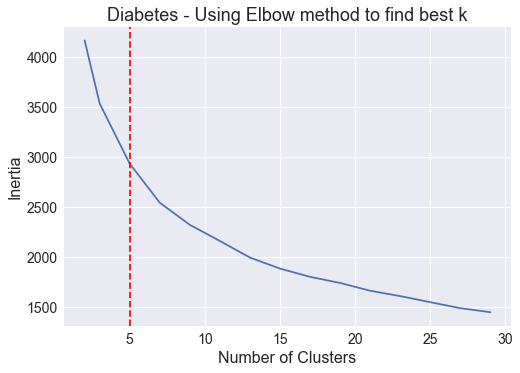

In [31]:
cluster_range = [2,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
#mean squared distance between each instance and its closest centroid. Also called inertia
msd = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=10)
    c_labels = c.fit(X_train)
    msd.append(c.inertia_)
plt.style.use('seaborn')
plt.plot([2,3,5,7,9,11,13,15,17,19,21,23,25,27,29],msd)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Diabetes - Using Elbow method to find best k', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

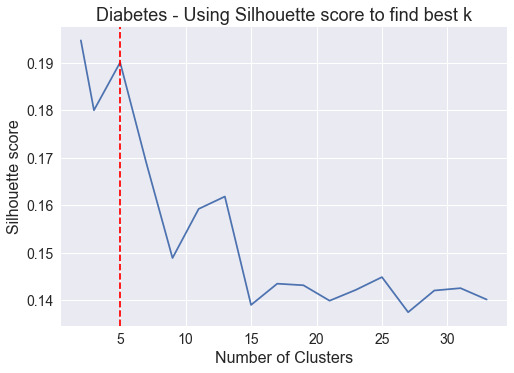

In [30]:
cluster_range = [2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33]
#mean squared distance between each instance and its closest centroid. Also called inertia
silhouette_list = []
for num_cluster in cluster_range:
    c = KMeans(n_clusters=num_cluster, random_state=10)
    c_labels = c.fit(X_train)
    silhouette_list.append(silhouette_score(X_train, c.labels_))
plt.style.use('seaborn')
plt.plot([2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33],silhouette_list)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Silhouette score', fontsize = 16)
plt.title('Diabetes - Using Silhouette score to find best k', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.1946984829448386
For n_clusters = 3 The average silhouette_score is : 0.1799912901328683
For n_clusters = 4 The average silhouette_score is : 0.19872583849298042
For n_clusters = 5 The average silhouette_score is : 0.19005790287108876
For n_clusters = 6 The average silhouette_score is : 0.169461313200732
For n_clusters = 7 The average silhouette_score is : 0.16888609104766775
For n_clusters = 8 The average silhouette_score is : 0.1534482630395134
For n_clusters = 9 The average silhouette_score is : 0.14886393479822882
For n_clusters = 10 The average silhouette_score is : 0.15540630996542165


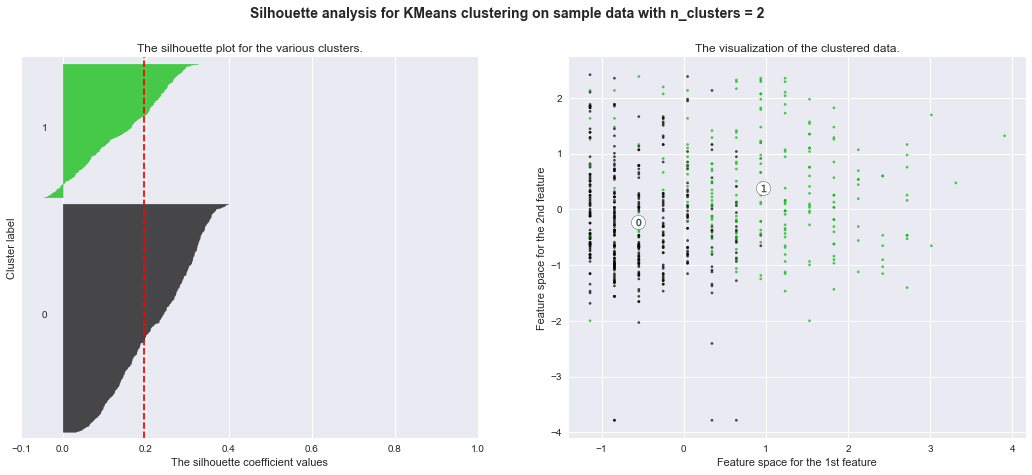

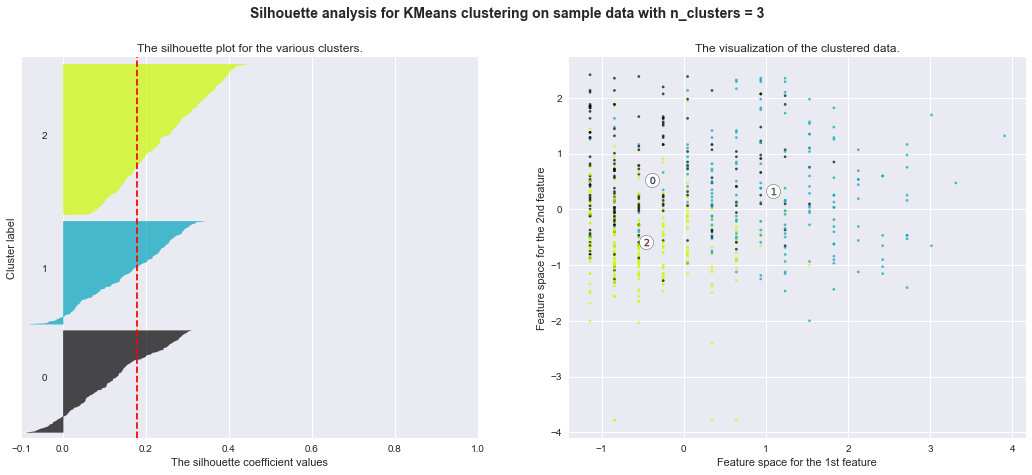

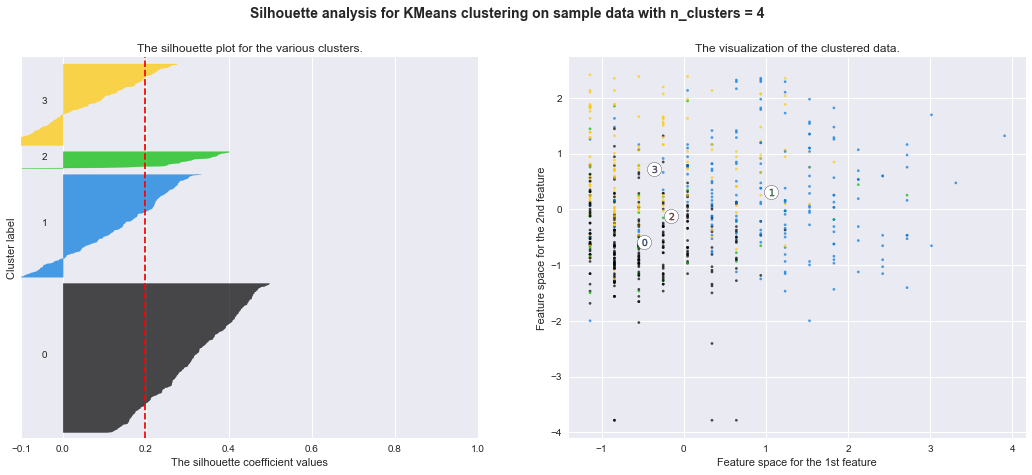

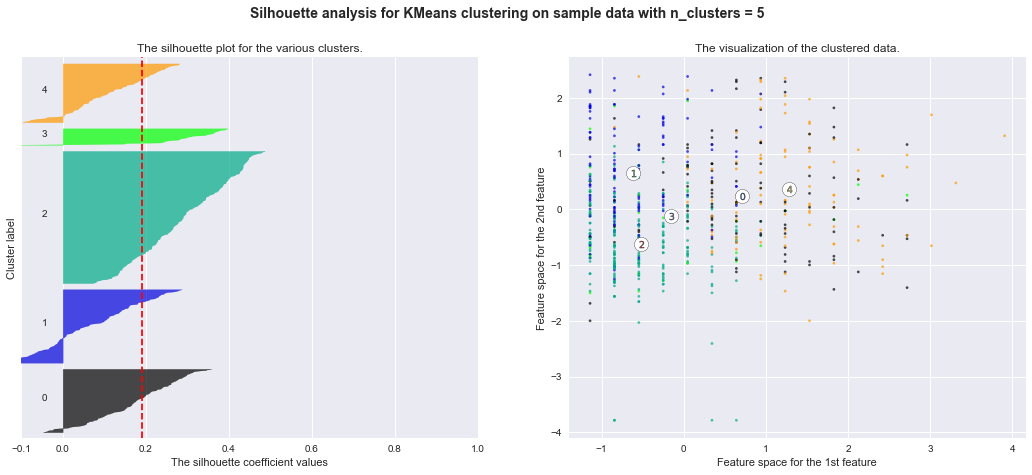

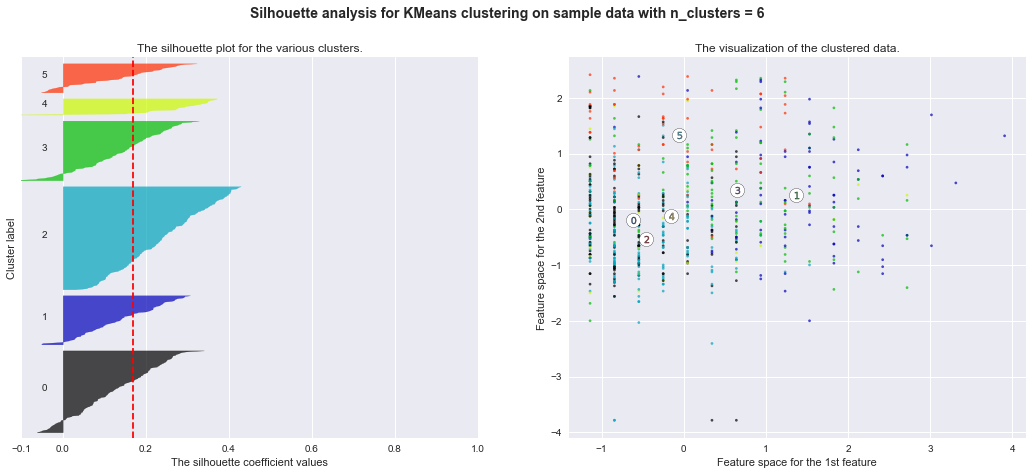

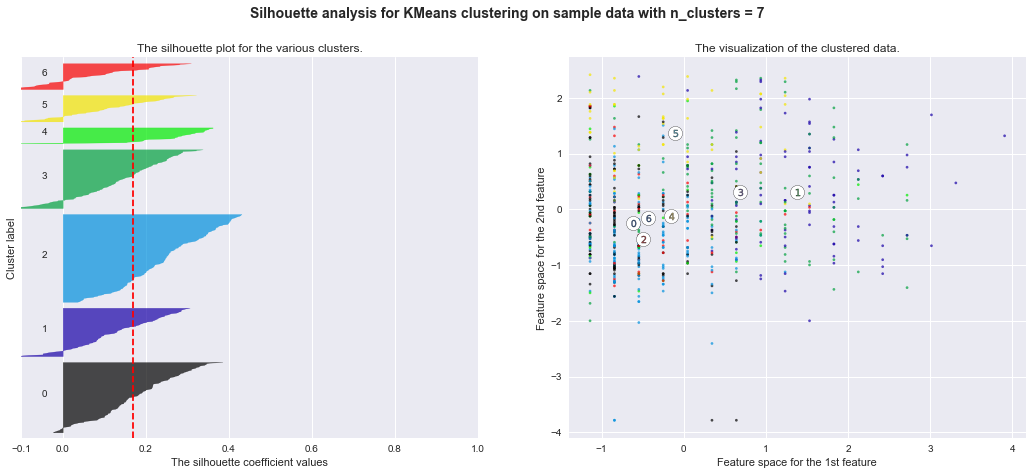

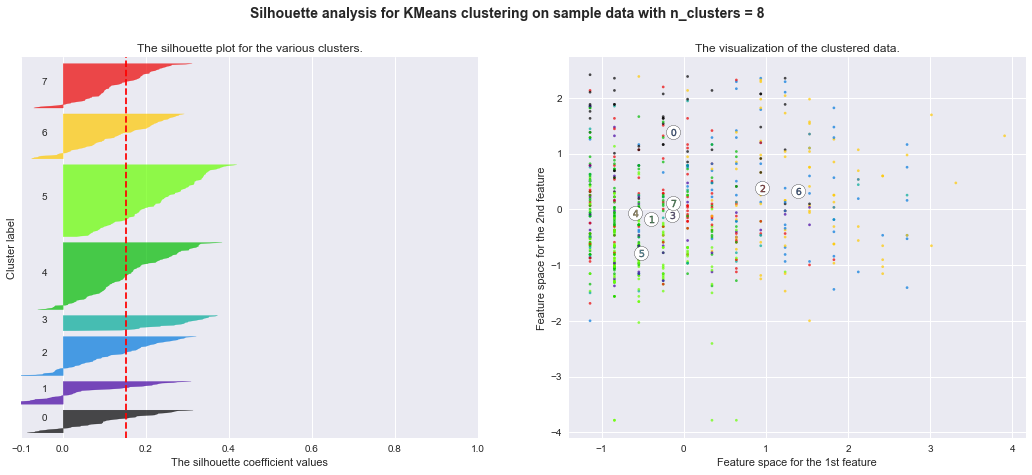

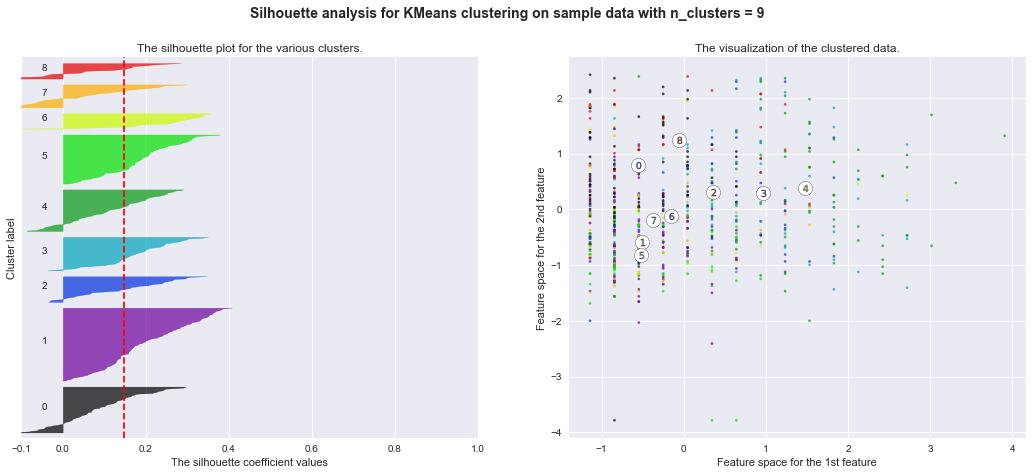

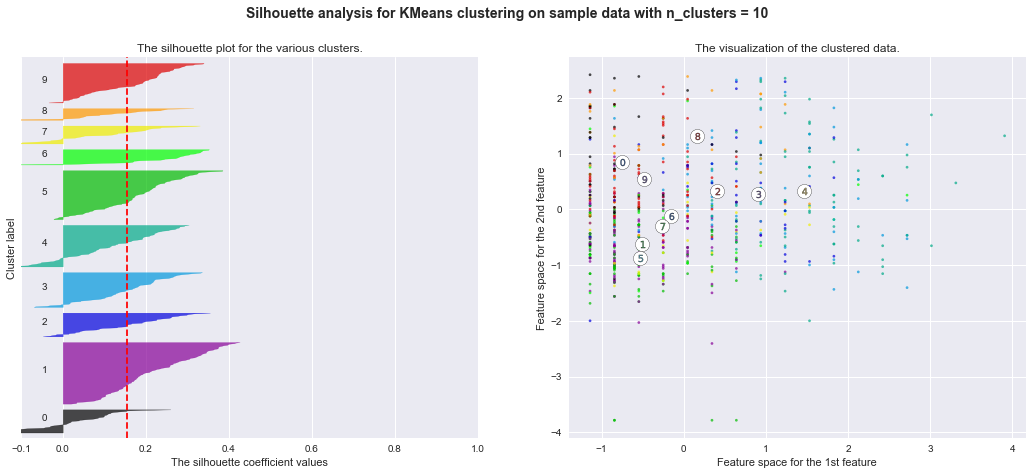

In [16]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train[:, 0], X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [17]:
cluster_range = [2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
#mean squared distance between each instance and its closest centroid. Also called inertia
bic_main = []
bic_by_cv = []
covariance_type = ['spherical', 'tied', 'diag', 'full']
for cv in covariance_type:
    for num_cluster in cluster_range:
        gmm = GaussianMixture(covariance_type = cv, n_components = num_cluster, n_init = 10,random_state=1)
        c_labels = gmm.fit(X_train)
        bic_by_cv.append(gmm.bic(X_train))
    bic_main.append(bic_by_cv)
    bic_by_cv = []

In [18]:
#covariance_type diag has the smallest bic
[min(i) for i in bic_main]

[12512.100331547637, 12501.162658497062, 5791.501343845641, 7280.737371448527]

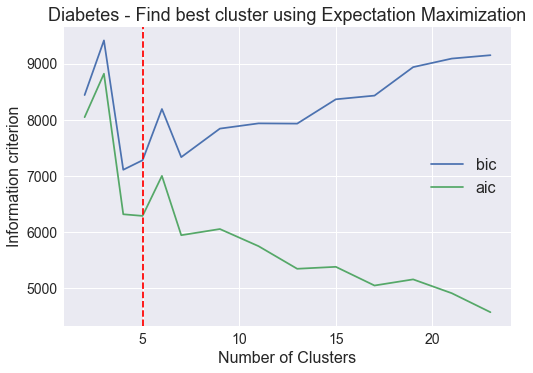

In [19]:
cluster_range = [2,3,4,5,6,7,9,11,13,15,17,19,21,23]
bic = []
aic = []
for num_cluster in cluster_range:
    gmm = GaussianMixture(covariance_type = 'full', n_components = num_cluster, n_init = 10,random_state=1)
    c_labels = gmm.fit(X_train)
    bic.append(gmm.bic(X_train))
    aic.append(gmm.aic(X_train))
plt.style.use('seaborn')
plt.plot([2,3,4,5,6,7,9,11,13,15,17,19,21,23],bic,label = 'bic')
plt.plot([2,3,4,5,6,7,9,11,13,15,17,19,21,23],aic,label = 'aic')
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('Information criterion', fontsize = 16)
plt.title('Diabetes - Find best cluster using Expectation Maximization', fontsize = 18)
plt.legend(fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()

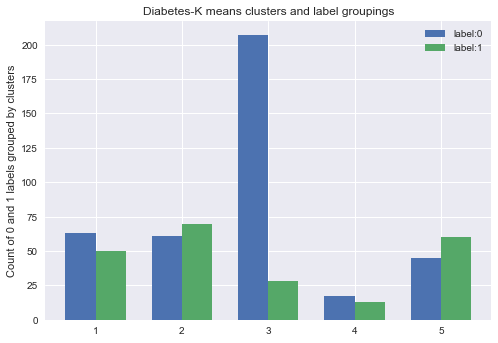

In [34]:
rows = X_train.shape[0]
y_train2 = y_train.to_numpy()
y_train2 = np.reshape(y_train2,(rows,1))
X_train_vis = np.hstack((X_train,y_train2))

columns = list(df.columns)
columns.append('y')
c = KMeans(n_clusters=5, random_state=10)
c_labels = c.fit_predict(X_train)
df_converted = convert_numarr_to_df(X_train_vis,c_labels,columns)

df_converted.groupby(['class','y']).count()

#diabetes-kmeans grouping
clusters = ['1', '2', '3', '4' ,'5']
zero_label = [63, 61, 207,17,45]
one_label = [50, 70, 28,13,60]

x = np.arange(len(clusters))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, zero_label, width, label='label:0')
rects2 = ax.bar(x + width/2, one_label, width, label='label:1')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of 0 and 1 labels grouped by clusters')
ax.set_title('Diabetes-K means clusters and label groupings')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

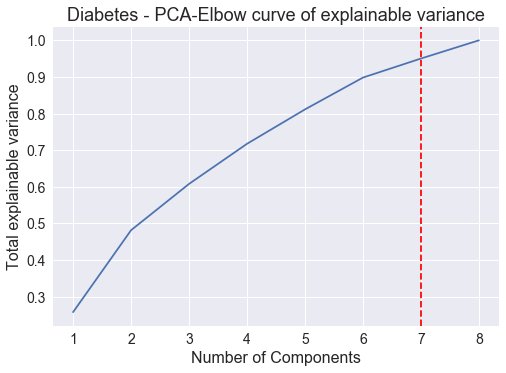

(614, 7)

In [21]:
#PCA
n_features = X_train.shape[1]
total_explained_variance = []
pca = PCA(n_components = n_features, random_state = 42)
X_reduced = pca.fit_transform(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.style.use('seaborn')
plt.plot(range(1,n_features+1),cumsum)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Total explainable variance', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Diabetes - PCA-Elbow curve of explainable variance', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(20000,35000)
plt.axvline(x=7,color='r', linestyle='--')
plt.show()

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape

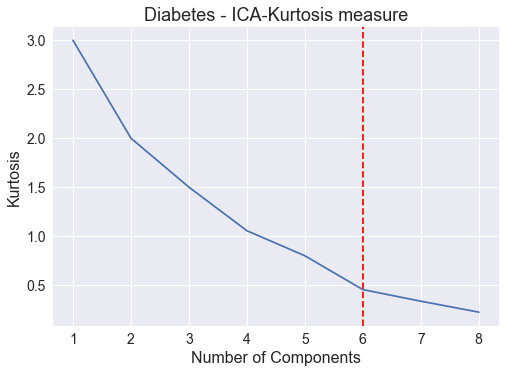

In [22]:
#ICA
n_features = X_train.shape[1]
total_explained_variance = []
kurtosis_avg = []
for feature in range(1,n_features+1):
    ica = FastICA(n_components = feature, random_state = 42,whiten = True)
    X_reduced = ica.fit_transform(X_train)
    kurtosis_col_list = []
    for col in range(X_reduced.shape[1]):
        kurtosis_col_list.append(kurtosis(X_reduced[col]))
    kurtosis_avg.append(np.abs(np.mean(kurtosis_col_list)))

plt.style.use('seaborn')
plt.plot(range(1,n_features+1),kurtosis_avg)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Kurtosis', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Diabetes - ICA-Kurtosis measure', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(20000,35000)
plt.axvline(x=6,color='r', linestyle='--')
plt.show()

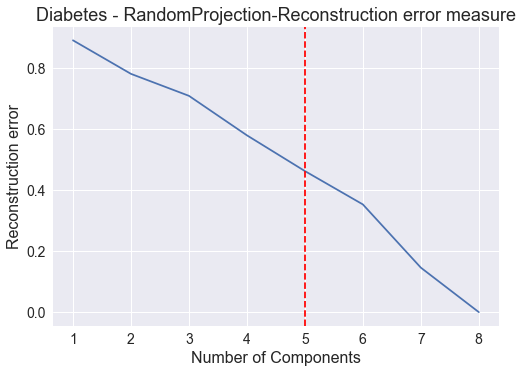

[0.88954795386412, 0.7798007651149401, 0.7078948330817534, 0.5786726377705296, 0.46171465025964015, 0.3525094300702976, 0.1455996960116496, 6.203594182797361e-29]


In [23]:
#randomized projection
n_features = X_train.shape[1]
error_list = []
for feature in range(1,n_features+1):
    transformer = random_projection.GaussianRandomProjection(n_components=feature,random_state=55)
    X_new = transformer.fit_transform(X_train)
    W = transformer.components_
    p = pinv(W)
    reconstructed_matrix = ((p.dot(W)).dot(X_train.T)).T
    error = np.mean(np.square(reconstructed_matrix-X_train))
    error_list.append(error)
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),error_list)
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Reconstruction error', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Diabetes - RandomProjection-Reconstruction error measure', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(20000,35000)
plt.axvline(x=5,color='r', linestyle='--')
plt.show()
print(error_list)

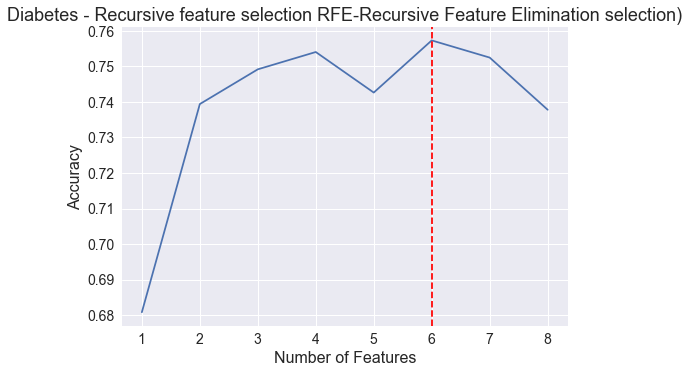

In [26]:
#recursive feature selection RFE
#dim reduction using labels
n_features = X_train.shape[1]
y_train=y_train.astype('int')
accuracy_list = []
for feature in range(1,n_features+1):
    selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=feature)
    selector = selector.fit(X_train, y_train)
    X_reduced = X_train[:,selector.support_]
    rf = RandomForestClassifier(random_state=42)
    mean_accuracy = np.mean(cross_val_score(rf, X_reduced, y_train, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise'))
    accuracy_list.append(mean_accuracy)
plt.style.use('seaborn')
plt.plot(range(1,n_features+1),accuracy_list)
plt.xlabel('Number of Features', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
#plt.legend(fontsize=16)
plt.title('Diabetes - Recursive feature selection RFE-Recursive Feature Elimination selection)', fontsize = 18)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(0.75,0.81)
plt.axvline(x=6,color='r', linestyle='--')
plt.show()